# Name: V Raghav Anand

# Problem statement: Preprocessing of the given dataset and comparing the accuracy of Multi Linear Regression and Decision Tree algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

# Visualizing outliers using boxplot

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

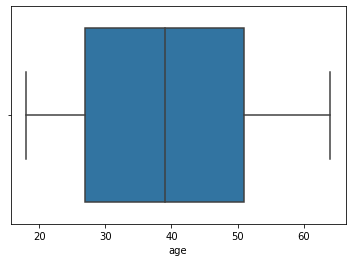

In [6]:
import seaborn as sns
sns.boxplot(dataset['age'])

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

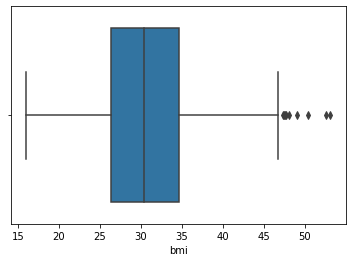

In [7]:
sns.boxplot(dataset['bmi'])

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children'>

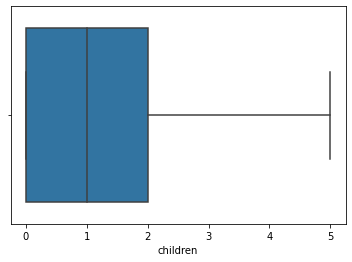

In [8]:
sns.boxplot(dataset['children'])

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

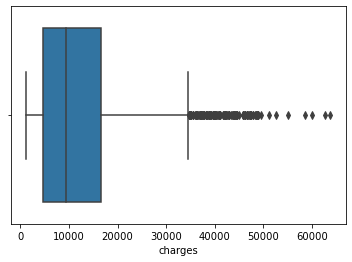

In [9]:
sns.boxplot(dataset['charges'])

# Encoding of categorical variables

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [11]:
ct=ColumnTransformer([("on",OneHotEncoder(drop='first'),[1,4,5])],remainder='passthrough')
dataset=ct.fit_transform(dataset)
dataset

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.79000000e+01, 0.00000000e+00, 1.68849240e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.37700000e+01, 1.00000000e+00, 1.72555230e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.30000000e+01, 3.00000000e+00, 4.44946200e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.90700000e+01, 0.00000000e+00, 2.91413603e+04]])

In [12]:
dataset.shape

(1338, 9)

# Filtering outliers

In [13]:
from scipy import stats

In [14]:
z=np.abs(stats.zscore(dataset))
z

array([[1.0105187 , 1.97058663, 0.56641788, ..., 0.45332   , 0.90861367,
        0.2985838 ],
       [0.98959079, 0.5074631 , 0.56641788, ..., 0.5096211 , 0.07876719,
        0.95368917],
       [0.98959079, 0.5074631 , 0.56641788, ..., 0.38330685, 1.58092576,
        0.72867467],
       ...,
       [1.0105187 , 0.5074631 , 0.56641788, ..., 1.0148781 , 0.90861367,
        0.96159623],
       [1.0105187 , 0.5074631 , 0.56641788, ..., 0.79781341, 0.90861367,
        0.93036151],
       [1.0105187 , 1.97058663, 1.76548098, ..., 0.26138796, 0.90861367,
        1.31105347]])

In [15]:
z.shape

(1338, 9)

In [16]:
threshold=3
np.where(z>threshold)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([7, 8, 7, 6, 7, 7, 7, 7, 8, 7, 8, 7, 8, 6, 7, 7, 7, 7, 7, 6, 7, 7,
        7, 8, 8, 7, 7, 8, 6], dtype=int64))

In [17]:
clean_df= pd.DataFrame(dataset)
clean_df

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,1.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,1.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,1.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,1.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,1.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0,10600.54830
1334,0.0,0.0,0.0,0.0,0.0,18.0,31.920,0.0,2205.98080
1335,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0,1629.83350
1336,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0,2007.94500


In [18]:
df_no_outliers=clean_df[(z<=3).all(axis=1)]
df_no_outliers

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,1.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,1.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,1.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,1.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,1.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0,10600.54830
1334,0.0,0.0,0.0,0.0,0.0,18.0,31.920,0.0,2205.98080
1335,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0,1629.83350
1336,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0,2007.94500


In [19]:
df_no_outliers.shape

(1309, 9)

# Separating dependent and independent variables

In [20]:
x=df_no_outliers.iloc[:,0:8].values
x

array([[ 0.  ,  1.  ,  0.  , ..., 19.  , 27.9 ,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 18.  , 33.77,  1.  ],
       [ 1.  ,  0.  ,  0.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., 18.  , 36.85,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., 21.  , 25.8 ,  0.  ],
       [ 0.  ,  1.  ,  1.  , ..., 61.  , 29.07,  0.  ]])

In [21]:
y=df_no_outliers.iloc[:,8].values # The variable to be predicted, i.e the insurance charges
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

# Splitting train and test data

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) # 20% test size

In [23]:
x_train.shape

(1047, 8)

In [24]:
x_test.shape

(262, 8)

In [25]:
y_train.shape

(1047,)

In [26]:
y_test.shape

(262,)

# Multi-Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
mr=LinearRegression()

In [29]:
mr.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred=mr.predict(x_test)
y_pred

array([ 2315.07126773,  3905.17086364, 14262.50792259,  7087.68662254,
       13557.2104806 , 12926.3163226 ,  3471.74542868,   531.66995661,
       15376.78741959,  5961.84042146, 11091.29900675,  1038.62627241,
        5825.27056799,  5827.45187585, 36004.67743698, 26715.64851828,
       34260.10097707,  1676.80278412,  5343.12760483, 14925.17725951,
        5569.08880672, 13698.4286511 ,  4884.00364843, 26340.93770563,
        2979.73296632,  2219.28617577,  5322.00522029,  6316.91484342,
       14662.24678614, 30452.30311078,  8799.82124754,  6715.71713562,
        4411.67047539, 10056.96538347, 12152.66169525, 14374.04834497,
       11235.80210038,  9096.41335891,  7617.90843909,  9704.08950784,
       35944.08885415, 14819.01667603,  7944.22782105, 32436.31524887,
       36080.3152829 , 11918.46039635, 14824.68234484,  9120.90572037,
       11570.72934378,  7825.22660723, 12809.86780703, 14061.97593977,
        3742.08982591, 37893.16185871,  6361.27503242, 11537.84684014,
      

In [31]:
y_test

array([ 2200.83085 ,  3056.3881  , 12643.3778  ,  4433.9159  ,
       14988.432   , 10806.839   ,  3756.6216  ,  1615.7667  ,
       13822.803   ,  4661.28635 , 27346.04207 ,  2103.08    ,
        4243.59005 ,  5472.449   , 43921.1837  , 17942.106   ,
       26109.32905 ,  2198.18985 ,  4883.866   , 13974.45555 ,
        1146.7966  , 12244.531   ,  2904.088   , 34303.1672  ,
        2104.1134  ,  2597.779   ,  2498.4144  ,  5383.536   ,
        8569.8618  , 21472.4788  ,  6238.298   ,  5152.134   ,
       14133.03775 ,  9225.2564  , 10407.08585 , 13019.16105 ,
       12124.9924  ,  8059.6791  ,  5327.40025 ,  5979.731   ,
       43813.8661  , 14692.66935 ,  5012.471   , 39983.42595 ,
       44202.6536  , 14254.6082  ,  9704.66805 ,  5138.2567  ,
       10704.47    ,  5425.02335 , 13224.693   , 11945.1327  ,
        2250.8352  , 46661.4424  ,  3659.346   , 11554.2236  ,
       37133.8982  , 40182.246   ,  3484.331   ,  1748.774   ,
       46113.511   ,  3556.9223  , 11345.519   ,  1720.

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7866370624891947

# Decision tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dt=DecisionTreeRegressor(criterion='mae',max_depth=4,random_state=0)

In [35]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=4, random_state=0)

In [36]:
y_pred=dt.predict(x_test)
y_pred

array([ 2218.52315 ,  4260.744   , 11404.2926  ,  5003.853   ,
       13635.6379  , 11404.2926  ,  5003.853   ,  2218.52315 ,
       13635.6379  ,  4260.744   , 11404.2926  ,  2218.52315 ,
        5003.853   ,  5003.853   , 42257.415175, 18319.49005 ,
       23353.926375,  2218.52315 ,  5003.853   , 13635.6379  ,
        2218.52315 , 13635.6379  ,  2218.52315 , 36053.1151  ,
        2218.52315 ,  2218.52315 ,  2218.52315 ,  6743.07645 ,
        8302.53565 , 18319.49005 ,  6743.07645 ,  5003.853   ,
        2218.52315 ,  8302.53565 ,  8302.53565 , 11404.2926  ,
       13635.6379  ,  6743.07645 ,  5003.853   ,  6743.07645 ,
       42257.415175, 13635.6379  ,  5003.853   , 39144.3635  ,
       42257.415175, 13635.6379  ,  8302.53565 ,  5003.853   ,
       11404.2926  ,  5003.853   , 13635.6379  , 11404.2926  ,
        2218.52315 , 42257.415175,  5003.853   , 11404.2926  ,
       36053.1151  , 39144.3635  ,  4260.744   ,  2218.52315 ,
       39144.3635  ,  2218.52315 , 11404.2926  ,  2218.

In [37]:
y_test

array([ 2200.83085 ,  3056.3881  , 12643.3778  ,  4433.9159  ,
       14988.432   , 10806.839   ,  3756.6216  ,  1615.7667  ,
       13822.803   ,  4661.28635 , 27346.04207 ,  2103.08    ,
        4243.59005 ,  5472.449   , 43921.1837  , 17942.106   ,
       26109.32905 ,  2198.18985 ,  4883.866   , 13974.45555 ,
        1146.7966  , 12244.531   ,  2904.088   , 34303.1672  ,
        2104.1134  ,  2597.779   ,  2498.4144  ,  5383.536   ,
        8569.8618  , 21472.4788  ,  6238.298   ,  5152.134   ,
       14133.03775 ,  9225.2564  , 10407.08585 , 13019.16105 ,
       12124.9924  ,  8059.6791  ,  5327.40025 ,  5979.731   ,
       43813.8661  , 14692.66935 ,  5012.471   , 39983.42595 ,
       44202.6536  , 14254.6082  ,  9704.66805 ,  5138.2567  ,
       10704.47    ,  5425.02335 , 13224.693   , 11945.1327  ,
        2250.8352  , 46661.4424  ,  3659.346   , 11554.2236  ,
       37133.8982  , 40182.246   ,  3484.331   ,  1748.774   ,
       46113.511   ,  3556.9223  , 11345.519   ,  1720.

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8573380711012522

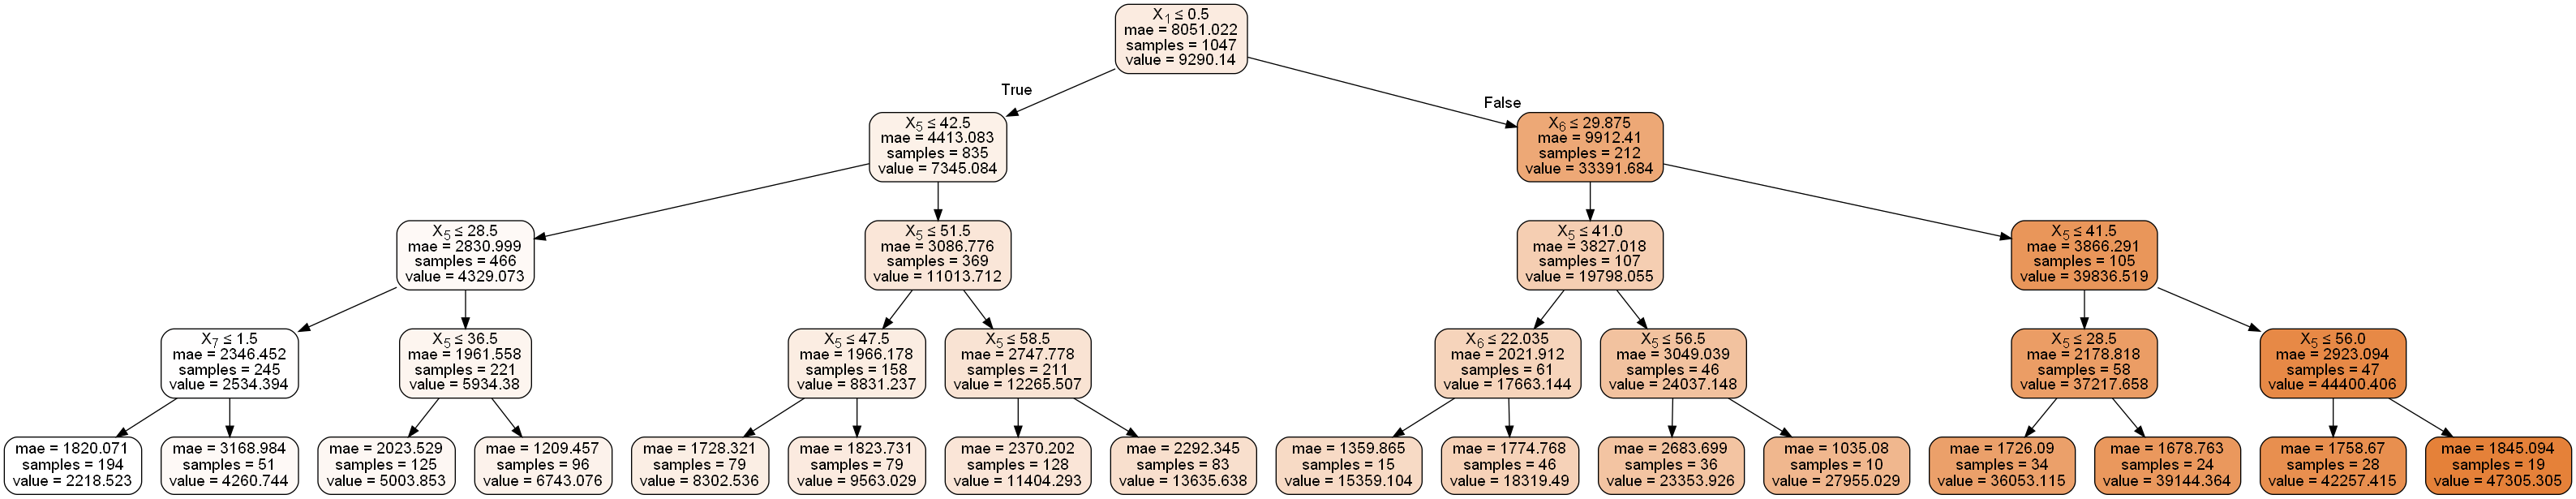

In [39]:
from six import StringIO # Visualizing the decision tree as a graph
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data, filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

The accuracy obtained for decision tree is 85.73%

# Thus, Decision Tree (85.73%) has a better accuracy than Multi-Linear Regression(78.66%) for the given dataset